<a href="https://colab.research.google.com/github/LaurenKarwacki/Lauren-Karwacki/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>.

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>.

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>.

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test.

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




### Lauren Karwacki

*NEUR265*

**3/8/2024**

In [49]:
# This code cell imports the pandas, matplotlib.pyplot, and scipy.stats packages to be used in future code cells.
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [50]:
# This cell imports the raw data from the patch_seq_expanded csv file as a pandas dataframe.
url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv'
patch_seq = pd.read_csv(url)

Text(0, 0.5, 'Value Counts')

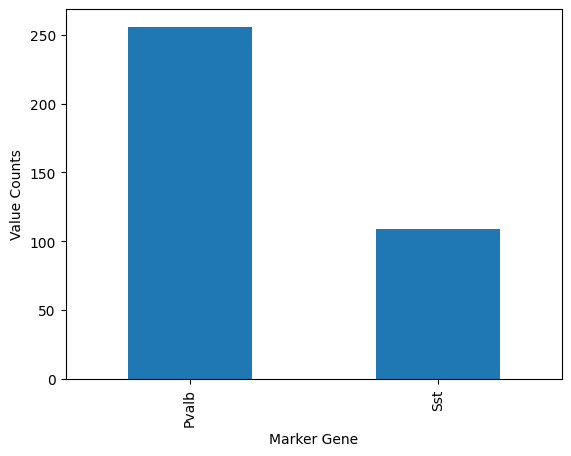

In [51]:
# This code cell plots a bar graph of the number of datapoints of each marker gene, labeling the axes accordingly.
patch_seq['Marker'].value_counts().plot(kind='bar')
plt.xlabel('Marker Gene')
plt.ylabel('Value Counts')

Text(0, 0.5, 'Marker Gene')

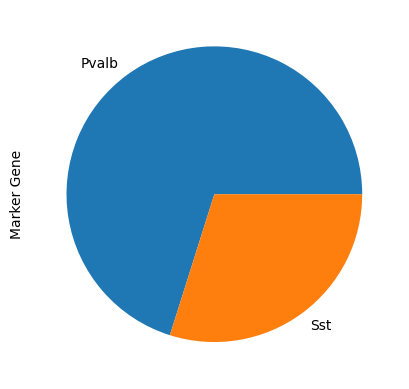

In [52]:
# This code cell plots a pie chart of the ratio of datapoints of each marker gene, labeling the y-axis with the "Marker Gene."
patch_seq['Marker'].value_counts().plot(kind='pie')
plt.ylabel('Marker Gene')

Text(0, 0.5, 'Fast Trough Value')

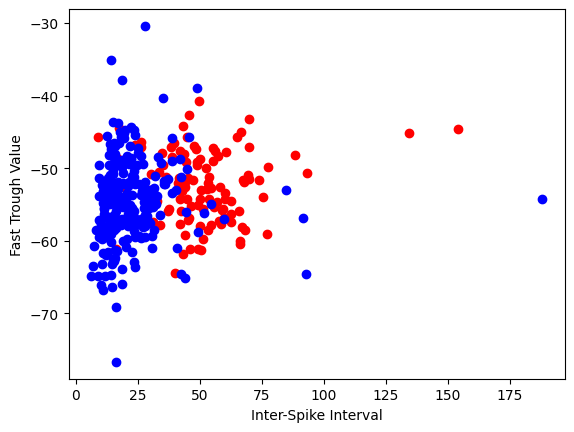

In [53]:
# This code cell creates a scatterplot of the patch_seq data using the for loop. The loop searches through all of the datapoints and plots a point for every point.
# The color of the point is changed based on the coded color. For example, if a datapoint were to have come from a Sst marker gene, the point would be plotted in red.
# If the datapoint were to have come from a Pvalb marker gene, the code sees that it did not come from the Sst gene, so it moves onto the next lines of code to plot it in blue.
# The x-axis and y-axis are labeled accordingly.
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = 'red')
  elif patch_seq.iloc[i,2] == 'Pvalb':
    plt.scatter(patch_seq.iloc[i,0], patch_seq.iloc[i,1],color = 'blue')

plt.xlabel('Inter-Spike Interval')
plt.ylabel('Fast Trough Value')

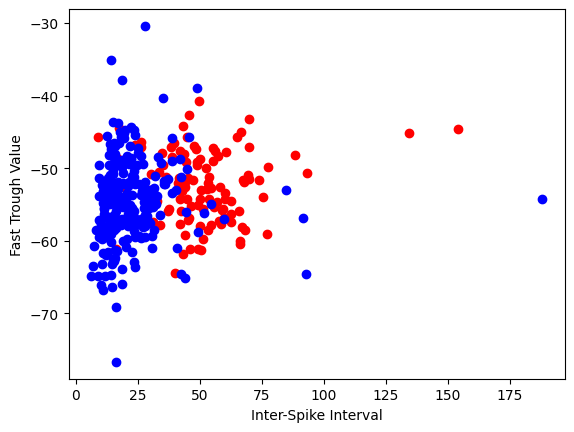

In [54]:
# This code cell defines the code above as "patchScatter()" so that when patchScatter() is printed, it will run the code from the cell above.
# plt.show() shows the plot when "patchScatter()" is coded.
def patchScatter():
  patch_length = len(patch_seq)

  for i in range(patch_length):
    if patch_seq.iloc[i,2] == 'Sst':
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = 'red')
    elif patch_seq.iloc[i,2] == 'Pvalb':
      plt.scatter(patch_seq.iloc[i,0], patch_seq.iloc[i,1],color = 'blue')

  plt.xlabel('Inter-Spike Interval')
  plt.ylabel('Fast Trough Value')

patchScatter()
plt.show()

In [55]:
# This code cell describes the data from the patch_seq dataset in terms of statistical concepts (including the means, standard deviations, and ranges).
patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


## Mean Analysis

* The Pvalb mean is slightly more negative than the Sst mean.
* This means that, on average, the Pvalb neurons would have a more negative undershoot when compared to the Sst neurons.

In [56]:
# This code cell finds the skew of each dataset in terms of the trough of the action potential.
patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

## Skew Analysis for Fast_Trough

* Because the skew for Pvalb is 0.19326, which is between -0.5 and +0.5, it can be assumed that the data displays a **normal** distribution.
* Because the skew for Sst is 0.00125, which is also between -0.5 and +0.5, it can be assumed that the data displays a **normal** distribution.

In [57]:
# This code cell finds the skew of each dataset in terms of ISI.
patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

## Skew Analysis for ISI

* Because the skew for Pvalb is 5.596386, which is not between -0.5 and +0.5, it can be assumed that the data displays a **skewed** distribution.
* Because the skew for Sst is 1.857850, which is also not between -0.5 and +0.5, it can be assumed that the data displays a **skewed** distribution.

In [58]:
# This line of code creates the variable "sst_neurons" that isolates the Sst data from the entire dataset.
sst_neurons = patch_seq[patch_seq['Marker'] == 'Sst']

# This line of code creates the variable "pvalb_neurons" that isolates the Pvalb data from the entire dataset.
pvalb_neurons = patch_seq[patch_seq['Marker'] == 'Pvalb']

# This line of code runs a statistical t-test to determine if the Fast_Trough means are statistically significantly different from each oher.
stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])

TtestResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585, df=363.0)

## T-Test Results - Fast_Trough

* Because p < 0.05 (0.0017), it can be determined that there is a statistically significant difference between the Sst and Pvalb Fast_Trough data means.

In [59]:
# This code drops all of the datapoints for the marker gene datapoints that do not have an ISI value associated with them.
# The code also develops new variables that isolate the marker genes, but don't include the marker genes that don't have an ISI datapoint associated with them.
patch_seq_drop = patch_seq.dropna()
sst_neurons_drop = patch_seq_drop[patch_seq_drop['Marker'] == 'Sst']
pvalb_neurons_drop = patch_seq_drop[patch_seq_drop['Marker'] == 'Pvalb']

# This line of code runs a statistical t-test to determine if the ISI means are statistically significantly different from each oher.
stats.ttest_ind(sst_neurons_drop['ISI'], pvalb_neurons_drop['ISI'])

TtestResult(statistic=14.643966775010774, pvalue=2.694292788633572e-38, df=354.0)

## T-Test Results - ISI

* Because p < 0.05 (2.69e-38), it can be determined that there is a statistically significant difference between the Sst and Pvalb ISI data means.
* *Note:* Because there was a "nan" p-value (and for the other results), the Not a Number values were dropped from the dataset to be able to perform the t-test.